In [1]:
import talos as ta

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\chances\plots.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  Fi

In [3]:
r = ta.Reporting('./hasil/5layer.csv')

In [4]:
# get the number of rounds in the Scan
r.rounds()

566

In [5]:
# get the highest result ('val_acc' by default)
r.high()

0.830509226

In [6]:
# get the highest result for any metric
r.high('acc')

0.999110921

In [7]:
# get the round with the best result
r.rounds2high('val_acc')

535

In [8]:
# get the best paramaters
r.best_params('val_acc')

array([["<class 'keras.layers.advanced_activations.PReLU'>", 60, 50, 0,
        30, 64, 0.01, 30, "<class 'keras.optimizers.Adam'>", 75,
        'he_normal', 0],
       ['<function relu at 0x000002310C9D2EA0>', 60, 50, 0, 30, 64, 0.01,
        15, "<class 'keras.optimizers.Adam'>", 100, 'he_uniform', 1],
       ['<keras.layers.advanced_activations.LeakyReLU object at 0x7f3552031630>',
        60, 50, 0, 30, 256, 0.01, 30, "<class 'keras.optimizers.Adam'>",
        75, 'he_uniform', 2],
       ["<class 'keras.layers.advanced_activations.PReLU'>", 50, 50, 0,
        30, 256, 0.01, 30, "<class 'keras.optimizers.Adam'>", 80,
        'he_normal', 3],
       ["<class 'keras.layers.advanced_activations.PReLU'>", 50, 50, 0,
        30, 64, 0.01, 30, "<class 'keras.optimizers.Adam'>", 75,
        'lecun_normal', 4],
       ['<function selu at 0x000002310CE2AB70>', 40, 50, 0, 30, 256,
        0.01, 30, "<class 'keras.optimizers.Adam'>", 80, 'glorot_normal',
        5],
       ['<keras.layers.adv

In [9]:
# get correlation for hyperparameters against a metric
r.correlate('loss')

first_neuron     0.003595
second_neuron   -0.055418
third_neuron    -0.024136
batch_size       0.024820
epochs                NaN
epochs2               NaN
dropout               NaN
lr               0.864114
Name: loss, dtype: float64

In [10]:
# get correlation for hyperparameters against a metric
r.correlate('acc')

first_neuron     0.000519
second_neuron    0.063670
third_neuron     0.031293
batch_size      -0.017812
epochs                NaN
epochs2               NaN
dropout               NaN
lr              -0.879203
Name: acc, dtype: float64

In [11]:
# get correlation for hyperparameters against a metric
r.correlate('val_acc')

first_neuron     0.001982
second_neuron    0.060568
third_neuron     0.061443
batch_size       0.000729
epochs                NaN
epochs2               NaN
dropout               NaN
lr              -0.907323
Name: val_acc, dtype: float64

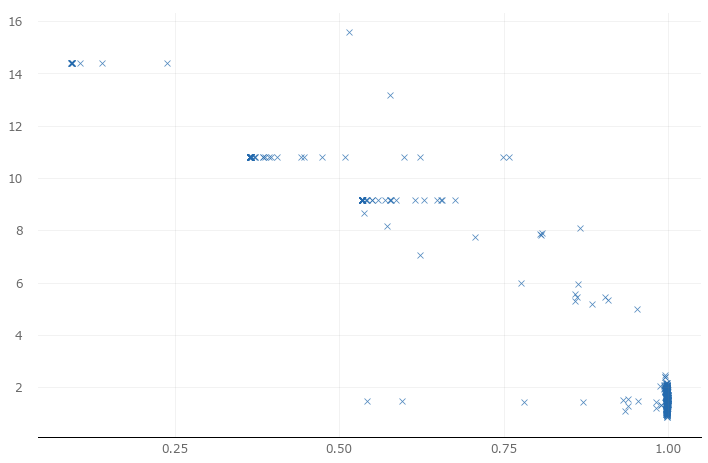

In [12]:
# a regression plot for two dimensions 
r.plot_regs('acc')

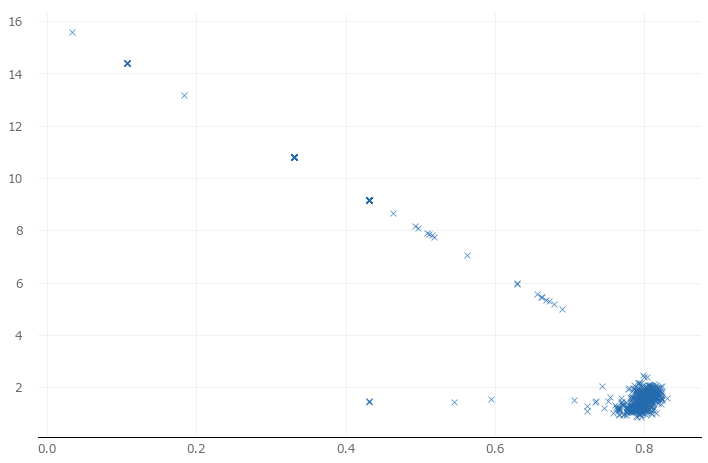

In [13]:
# a regression plot for two dimensions 
r.plot_regs('val_acc')

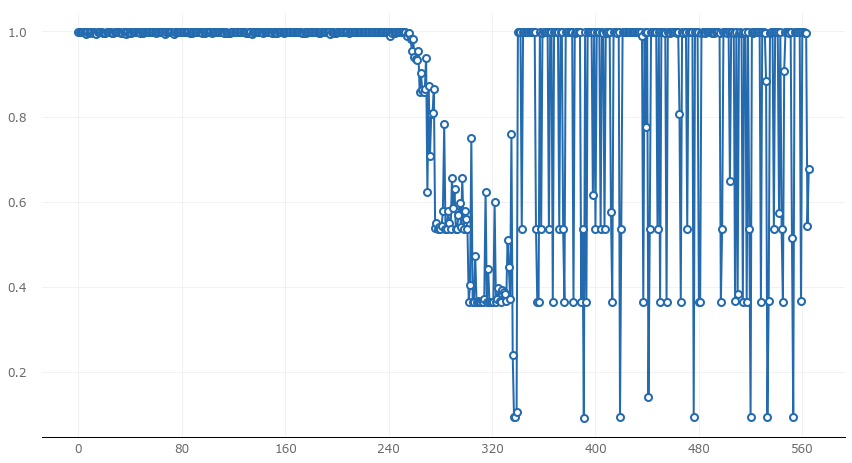

In [14]:
# line plot
r.plot_line('acc')

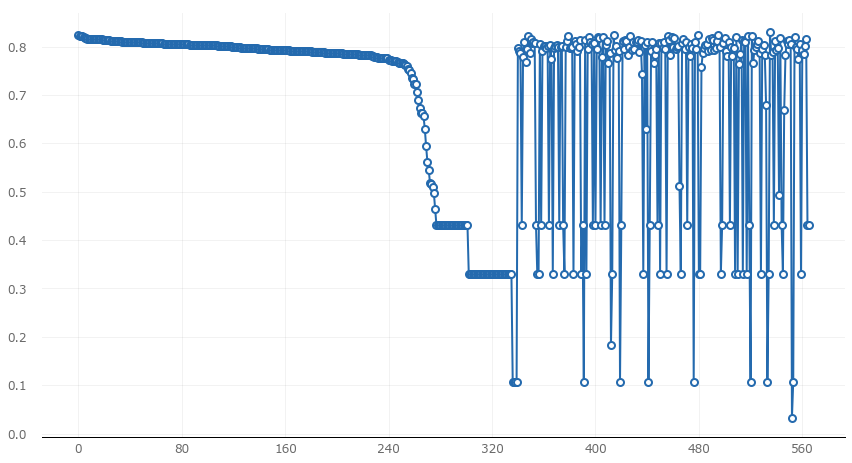

In [15]:
# line plot
r.plot_line('val_acc')

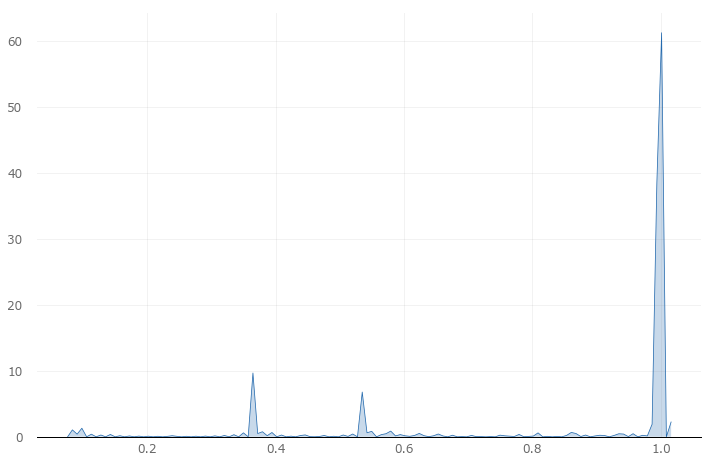

In [16]:
# up to two dimensional kernel density estimator
r.plot_kde('acc')

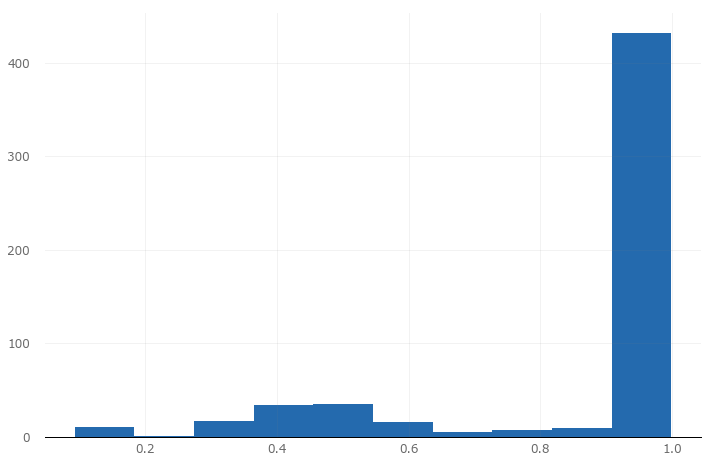

In [17]:

# a simple histogram
r.plot_hist('acc')

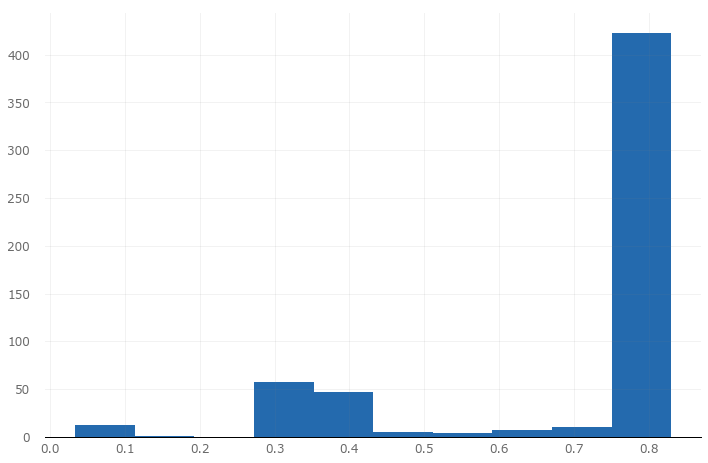

In [18]:

# a simple histogram
r.plot_hist('val_acc')

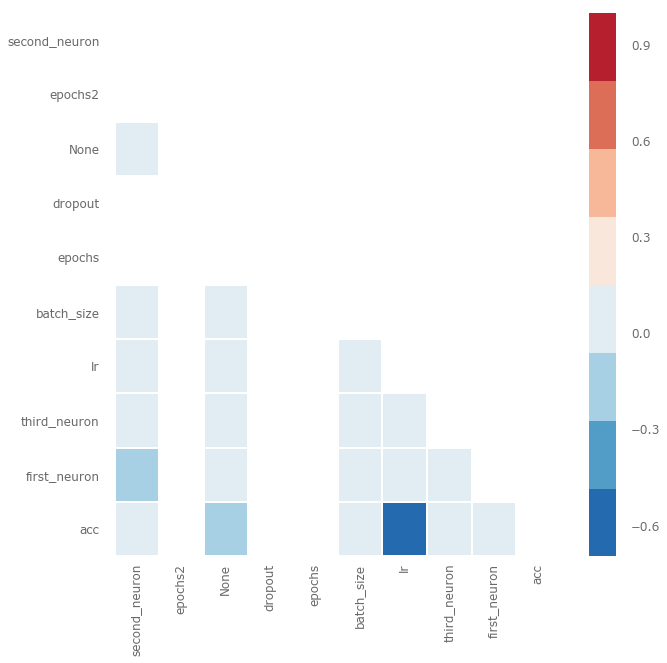

In [19]:
# heatmap correlation
r.plot_corr('acc')

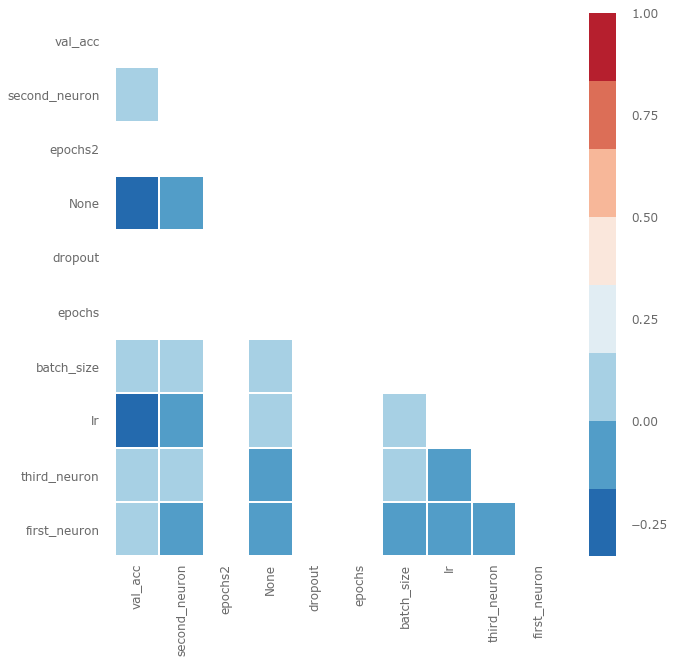

In [20]:
# heatmap correlation
r.plot_corr('val_acc')

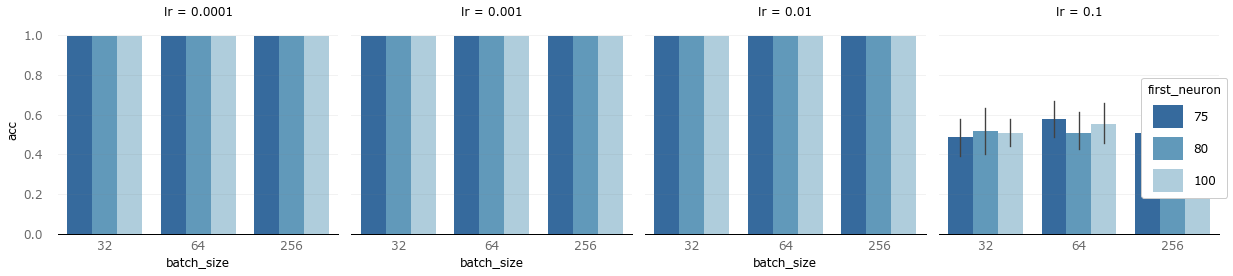

In [21]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'first_neuron', 'lr')


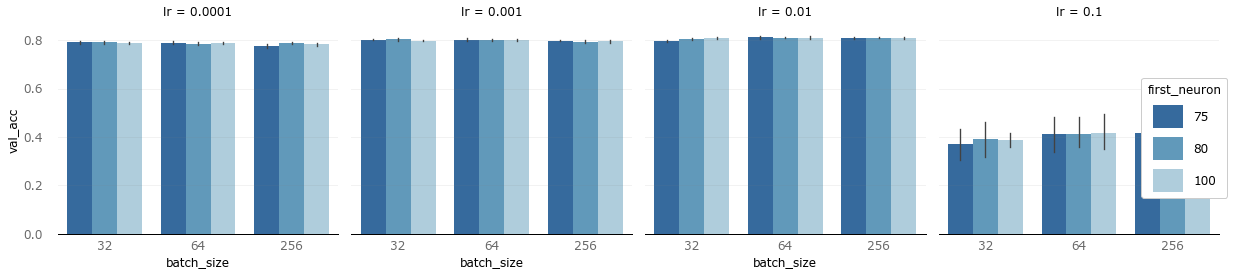

In [22]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'val_acc', 'first_neuron', 'lr')

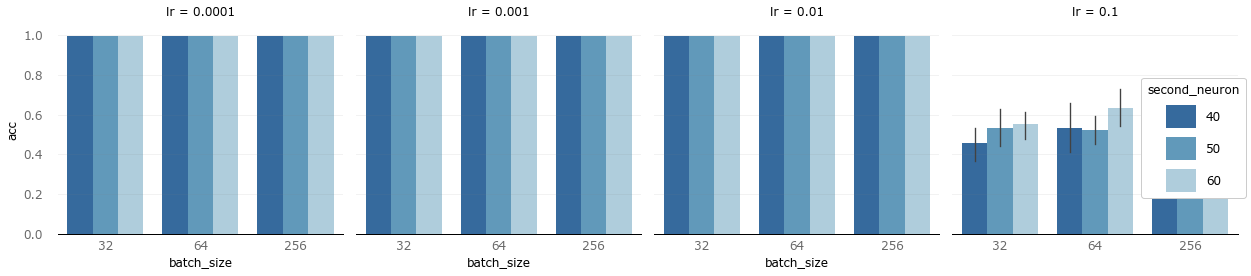

In [23]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'second_neuron', 'lr')

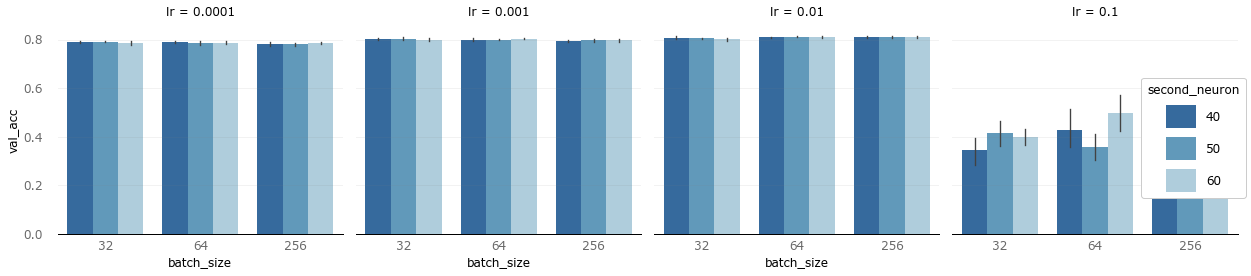

In [24]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'val_acc', 'second_neuron', 'lr')

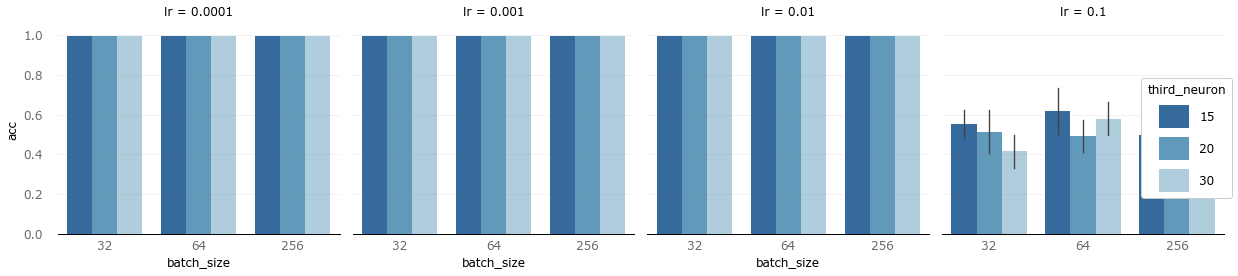

In [25]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'third_neuron', 'lr')

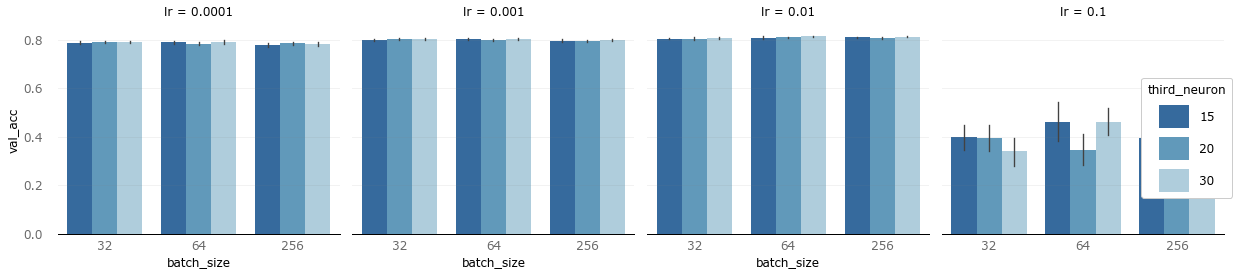

In [26]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'val_acc', 'third_neuron', 'lr')

# Matrik Confusion

### Open Data

In [27]:
import numpy as np
def load_matrices(file_name):
    with open(file_name, 'rb') as f:
        A = np.load(f)
        B = np.load(f)
        C = np.load(f)
        D = np.load(f)
        E = np.load(f)
        F = np.load(f)
    return (A,B,C,D,E,F)

In [28]:
my_file = '../data_NSL/data.npy'
train, test, test2, y_train, y_test, y_test2 = load_matrices(my_file)

### Create Model

Karena pada best model fungsi aktivasi yang tersimpan sebagai 'lrelu', tidak dikenali pada saat load model maka model perludibuat secara manual. Bobot kemudian akan diload dari hasil terbaik. 


In [29]:
from keras.layers import Input,Dense
from keras.models import Model, Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import PReLU
from keras.models import load_model
#actvation leakyrelu
LR= LeakyReLU(0.01)
LR.__name__ = 'lrelu'

In [32]:
# load model
filepath='./hasil/best5pr.hdf5'
dnn=load_model(filepath)
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 122)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 75)                9225      
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 75)                75        
_________________________________________________________________
dense_2 (Dense)              (None, 60)                4560      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 305       
Total params: 14,165
Trainable params: 14,165
Non-trainable params: 0
_________________________________________________________________


In [33]:
##loading dnn untuk data 
# load weights

dnn.load_weights(filepath)
# Compile model (required to make predictions)
dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

result_train = dnn.evaluate(train,y_train)
for name, value in zip(dnn.metrics_names, result_train):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_train[1]*100))

Created model and loaded weights from file
125973/125973 [==============================] - 12s 97us/step
loss 0.03456068523810852
acc 0.992379319378435
acc: 99.24%


In [34]:
##prediksi data Train

preds = dnn.predict(train)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(y_train, axis=1)

In [35]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
from sklearn.metrics import classification_report
outcomes = ['Normal','DoS','Probe' ,'R2L', 'U2R']
class_names=outcomes


target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names,labels=[1, 0, 2, 3,4], digits=5))
#print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

      Normal    0.99646   0.98964   0.99303     67343
         DoS    0.99830   0.99996   0.99913     45927
       Probe    0.98330   0.97975   0.98152     11656
         R2L    0.74275   0.97789   0.84425       995
         U2R    0.30488   0.96154   0.46296        52

    accuracy                        0.99238    125973
   macro avg    0.80514   0.98175   0.85618    125973
weighted avg    0.99362   0.99238   0.99280    125973



In [37]:
plt.rcParams.update(plt.rcParamsDefault)

Confusion matrix, without normalization
[[66645    75   193   336    94]
 [    2 45925     0     0     0]
 [  216     3 11420     1    16]
 [   18     0     0   973     4]
 [    1     0     1     0    50]]


<Figure size 640x480 with 0 Axes>

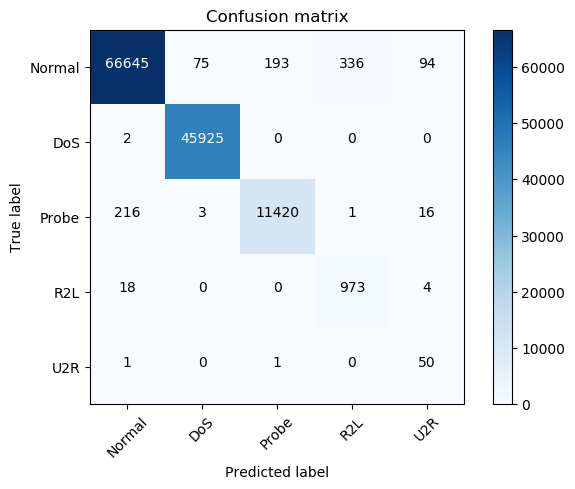

In [38]:
#outcomes = ['DoS', 'normal','Probe' ,'R2L', 'U2R']
class_names=outcomes

results = confusion_matrix(true_lbls, pred_lbls, labels=[1, 0, 2, 3,4])

# Plot non-normalized confusion matrix
plt.clf()
plt.figure()
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))

## Data Test

In [39]:
#Data Test
result_test = dnn.evaluate(test,y_test)
for name, value in zip(dnn.metrics_names, result_test):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_test[1]*100))

22544/22544 [==============================] - 2s 101us/step
loss 2.264297356624143
acc 0.8305092264017033
acc: 83.05%


In [40]:
##prediksi data Train
#y_test=y_test.to_numpy()

preds = dnn.predict(test)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(y_test, axis=1)

              precision    recall  f1-score   support

      Normal    0.76923   0.96077   0.85440      9711
         DoS    0.95908   0.84862   0.90048      7458
       Probe    0.76571   0.78026   0.77291      2421
         R2L    0.89482   0.41394   0.56604      2754
         U2R    0.46667   0.17500   0.25455       200

    accuracy                        0.83051     22544
   macro avg    0.77110   0.63572   0.66967     22544
weighted avg    0.84432   0.83051   0.82034     22544

Confusion matrix, without normalization
[[9330  104  255    7   15]
 [ 777 6329  276   76    0]
 [ 316  166 1889   44    6]
 [1586    0    9 1140   19]
 [ 120    0   38    7   35]]


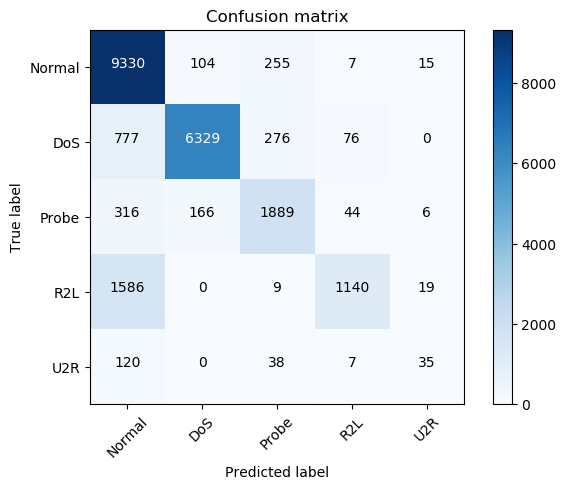

In [41]:
target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names,labels=[1, 0, 2, 3,4], digits=5))


results = confusion_matrix(true_lbls, pred_lbls, labels=[1, 0, 2, 3,4])

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))